In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/no_pymc')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamz_5chain_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 5):
        traces[trace].append(np.load('earm_dreamz_5chain_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamz_5chain_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 5):
        logps[trace].append(np.load('earm_dreamz_5chain_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-115102.04394993]
 [-115102.04394993]
 [-115102.04394993]
 ..., 
 [  -4874.90234193]
 [  -4874.90234193]
 [  -4874.90234193]]
Logp of trace:  a  chain:  1  =  [-4981.02908011]
Logp of trace:  a  chain:  2  =  [-4968.61738738]
Logp of trace:  a  chain:  3  =  [-4961.14037268]
Logp of trace:  a  chain:  4  =  [-4980.14775346]
Logp of trace:  b  chain: 0 =  [[-1082371.00690368]
 [-1082371.00690368]
 [-1082176.22672939]
 ..., 
 [   -4975.18105267]
 [   -4975.18105267]
 [   -4975.18105267]]
Logp of trace:  b  chain:  1  =  [-4972.93514073]
Logp of trace:  b  chain:  2  =  [-4932.32101649]
Logp of trace:  b  chain:  3  =  [-4973.97772891]
Logp of trace:  b  chain:  4  =  [-4980.58883539]
Logp of trace:  c  chain: 0 =  [[-1088536.13172141]
 [-1088535.98719276]
 [-1088535.98719276]
 ..., 
 [   -4933.35827591]
 [   -4933.35827591]
 [   -4933.35827591]]
Logp of trace:  c  chain:  1  =  [-5054.25166557]
Logp of trace:  c  chain:  2  =  [-5000.06100482]
Logp of tra

In [5]:
from earm_exp_parameters import earm_rates
uni_idx = []
norm_idx = []
uni_n = 0
norm_n = 0
for i, param in enumerate(model.parameters_rules()):
    if earm_rates[param.name]['type'] == 'uniform':
        uni_idx.append(i)
        uni_n += 1
    elif earm_rates[param.name]['type'] == 'normal':
        norm_idx.append(i)
        norm_n += 1

kf mito:  -14.8452186131  -  0.154781386928
kr mito:  -4.15478138693  -  13.8452186131
kf cyto:  -16.0001205731  -  -1.00012057306
kr cyto:  -2.99987942694  -  15.0001205731


In [6]:
traces['b'][0][:,72]

array([-7.87543121, -7.87543121, -7.87543121, ..., -7.89041461,
       -7.89041461, -7.89041461])

In [7]:
traces['a'][0][:,72]

array([-8.49299035, -8.49299035, -8.49299035, ..., -8.67248317,
       -8.67248317, -8.67248317])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    uni_param_n = 0
    norm_param_n = uni_n
    for i, param in enumerate(model.parameters_rules()):
        if i in uni_idx:
            param_trace_dict_a[param.name] = [traces[run][chain][:,uni_param_n] for chain in range(len(traces[run]))]
            uni_param_n += 1
        else:
            param_trace_dict_a[param.name] = [traces[run][chain][:,norm_param_n] for chain in range(len(traces[run]))]
            norm_param_n += 1
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  95  of  105  parameters.
Percent of parameters with GR below 1.2:  90.4761904762
Number of parameters with GR below 1.1:  82  of  105  parameters.
Percent of parameters with GR below 1.1:  78.0952380952


[95, 90.47619047619048, 82, 78.0952380952381]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  95  of  105  parameters.
Percent of parameters with GR below 1.2:  90.4761904762
Number of parameters with GR below 1.1:  86  of  105  parameters.
Percent of parameters with GR below 1.1:  81.9047619048


[95, 90.47619047619048, 86, 81.9047619047619]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  84  of  105  parameters.
Percent of parameters with GR below 1.2:  80.0
Number of parameters with GR below 1.1:  59  of  105  parameters.
Percent of parameters with GR below 1.1:  56.1904761905


[84, 80.0, 59, 56.19047619047619]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  92  of  105  parameters.
Percent of parameters with GR below 1.2:  87.619047619
Number of parameters with GR below 1.1:  66  of  105  parameters.
Percent of parameters with GR below 1.1:  62.8571428571


[92, 87.61904761904762, 66, 62.857142857142854]

In [13]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-9.29087673, -9.29087673, -9.29087673, ..., -7.91755194,
        -7.91755194, -7.91755194]),
 array([-10.97890707, -10.97890707, -10.97890707, ...,  -9.10821753,
         -9.10821753,  -9.10821753]),
 array([-10.97890707, -10.97890707, -10.97890707, ...,  -8.48960018,
         -8.48960018,  -8.48960018]),
 array([-10.97890707, -10.97890707, -10.97890707, ...,  -8.33824538,
         -8.33824538,  -8.33824538]),
 array([-10.97890707, -10.97890707, -10.97890707, ...,  -6.77745284,
         -6.77745284,  -6.77745284])]

60000
5
60000


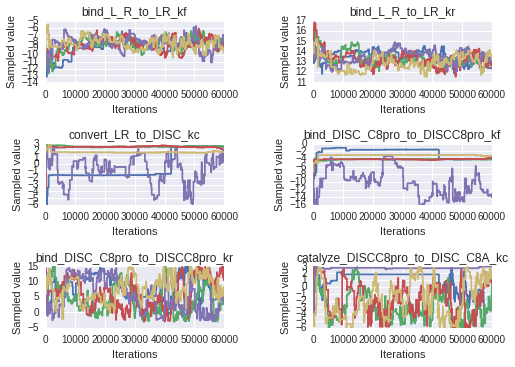

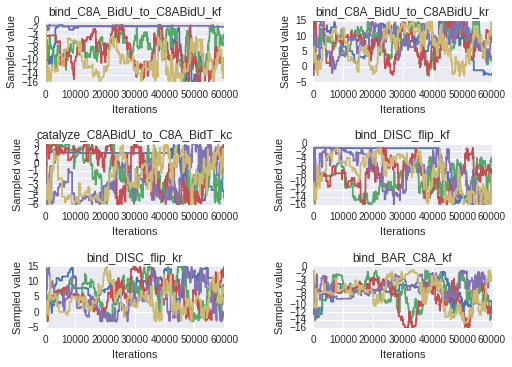

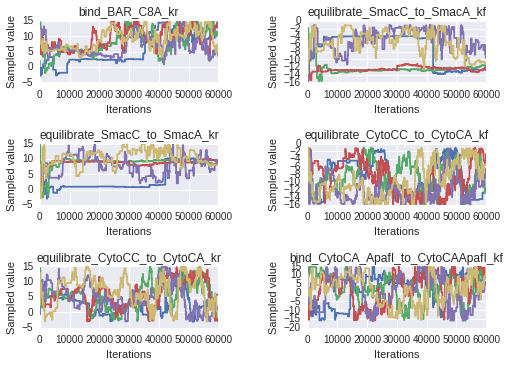

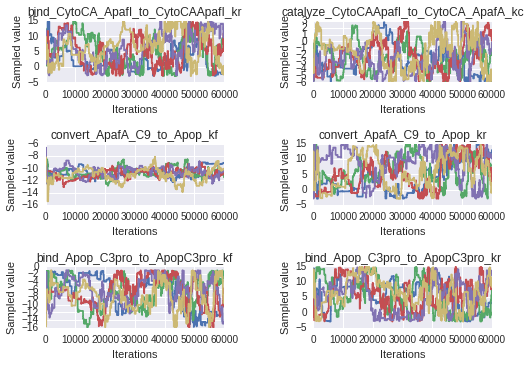

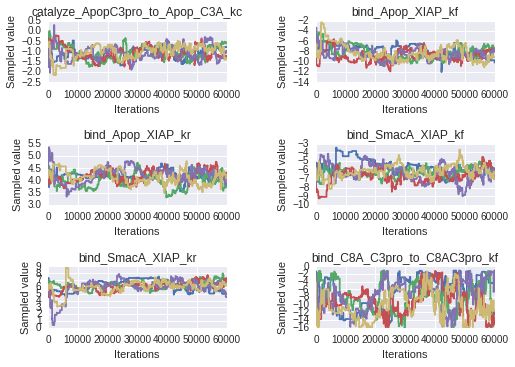

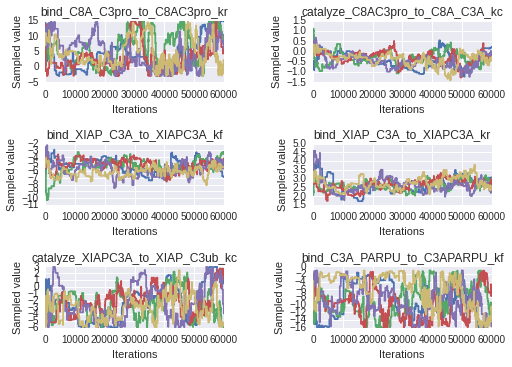

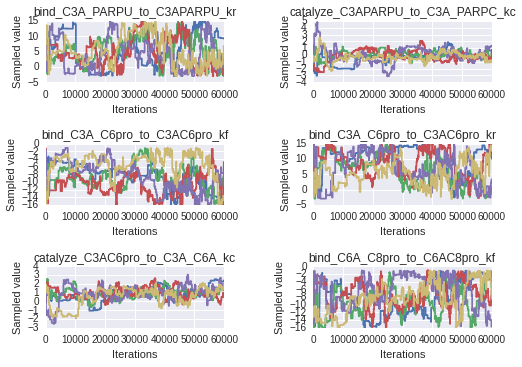

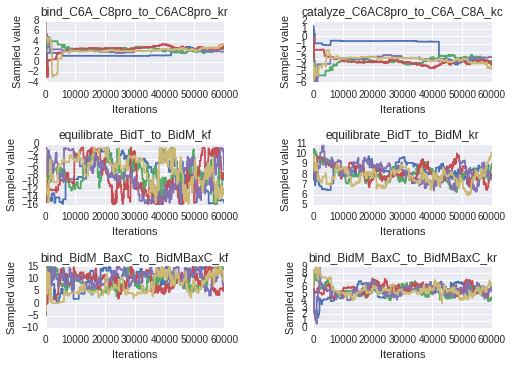

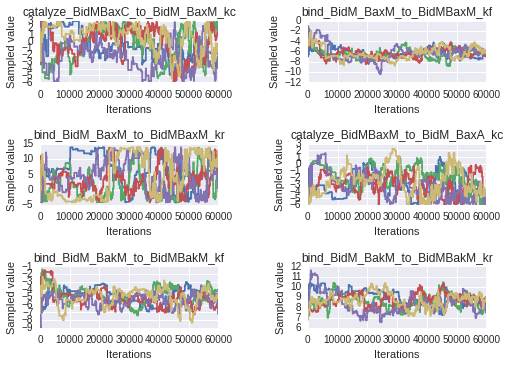

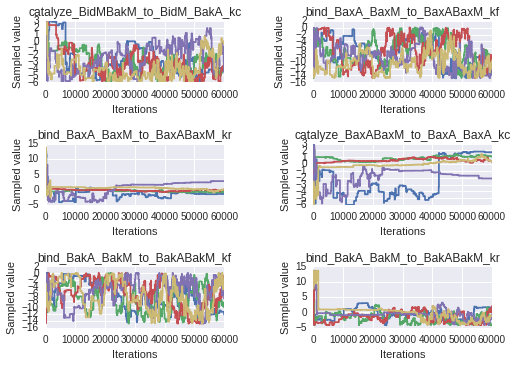

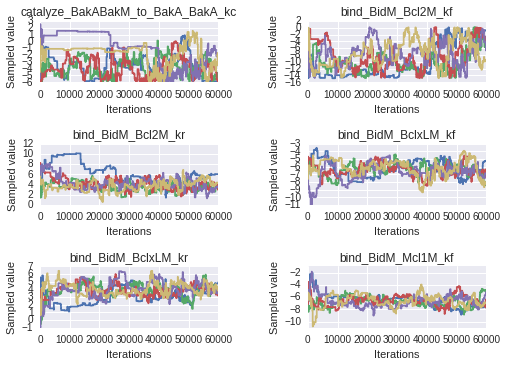

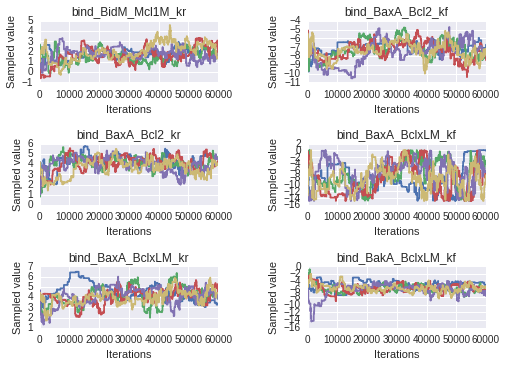

In [ ]:
sample_plots(param_trace_dicts['a'])

In [ ]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000)

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True)
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    if earm_rates[param_name]['type'] == 'uniform':
        ax.set_xlim([earm_rates[param_name]['lower'], earm_rates[param_name]['upper']])
    elif 'kf' in param_name:
        ax.set_xlim([-16, -1])
    elif 'kr' in param_name:
        ax.set_xlim([-3, 15])
    elif 'kc' in param_name:
        ax.set_xlim([-6, 3])

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)